#### Import Libraries

In [1]:
import os
import requests 
import pandas_datareader as pdr

import functools
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227

#### Import Ticker Data

In [2]:
start_date = '1995'
end_date = '2004'

budget = 5000000


# S&P 500
ticker = "^GSPC"

In [3]:
stock_df = pdr.get_data_yahoo(ticker, start_date, end_date)
#stock_df.to_csv('data/'+ticker.upper()+'.csv')

In [4]:
# stock_df.head()
stock_df.tail()
# stock_df.describe()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-24,1096.400024,1092.729980,1096.020020,1094.040039,518060000,1094.040039
2003-12-26,1098.469971,1094.040039,1094.040039,1095.890015,356070000,1095.890015
2003-12-29,1109.479980,1095.890015,1095.890015,1109.479980,1058800000,1109.479980
2003-12-30,1109.750000,1106.410034,1109.479980,1109.640015,1012600000,1109.640015
2003-12-31,1112.560059,1106.209961,1109.640015,1111.920044,1027500000,1111.920044


In [5]:
print('No Missing Data') if sum(stock_df.isna().sum())==0 else stock_df.isna().sum()

No Missing Data


In [6]:
stock_df = stock_df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1)
stock_df

,Close
Date,
1995-01-03,459.109985
1995-01-04,460.709991
1995-01-05,460.339996
1995-01-06,460.679993
1995-01-09,460.829987
...,...
2003-12-24,1094.040039
2003-12-26,1095.890015
2003-12-29,1109.479980


# Buy 

In [53]:
int_days = 90
days = str(int_days)

deviations = 2

In [43]:
stock_df[days+'_Mean'] = stock_df.Close.rolling(window=int_days).mean()
stock_df[days+'_Max'] = stock_df.Close.rolling(window=int_days).max()
stock_df[days+'_Min'] = stock_df.Close.rolling(window=int_days).min()

stock_df[days+'Price_Var'] = (stock_df.Close - stock_df[days+'_Mean']) / stock_df[days+'_Mean']
stock_df[days+'Max_Var'] = (stock_df[days+'_Mean'] - stock_df[days+'_Max']) / stock_df[days+'_Max']
stock_df[days+'Min_Var'] = (stock_df[days+'_Mean'] - stock_df[days+'_Min']) / stock_df[days+'_Min']

stock_df[days+'_Upper'] = stock_df.Close.rolling(window=int_days).std()*deviations + stock_df[days+'_Mean']
stock_df[days+'_Lower'] = stock_df[days+'_Mean'] - stock_df.Close.rolling(window=int_days).std()*deviations


In [54]:
stock_df[days+'_pct_roll'] = stock_df[days+'Price_Var'].rolling(window=int_days).mean()
stock_df[days+'_pct_std'] = stock_df[days+'Price_Var'].rolling(window=int_days).std()
stock_df[days+'_pct_std_upper'] = stock_df[days+'_pct_roll'] + stock_df[days+'_pct_std']*deviations
stock_df[days+'_pct_std_lower'] = stock_df[days+'_pct_roll'] - stock_df[days+'_pct_std']*deviations

stock_df[days+'_roll_max'] = stock_df.Close.rolling(window=int_days).max()

In [45]:
stock_df

,Close,30_Mean,30_Max,30_Min,30Price_Var,30Max_Var,30Min_Var,30_Upper,30_Lower,60_Mean,...,90_pct_std_upper,90_pct_std_lower,60_pct_roll,60_pct_std,60_pct_std_upper,60_pct_std_lower,30_pct_roll,30_pct_std,30_pct_std_upper,30_pct_std_lower
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03,459.109985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04,460.709991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05,460.339996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06,460.679993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09,460.829987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-24,1094.040039,1064.204004,1096.020020,1033.650024,0.028036,-0.029029,0.029559,1098.806878,1029.601130,1053.100500,...,0.057886,0.013937,0.026186,0.009876,0.045939,0.006434,0.012281,0.011663,0.035607,-0.011044
2003-12-26,1095.890015,1065.449337,1096.020020,1033.650024,0.028571,-0.027892,0.030764,1101.849670,1029.049004,1054.395001,...,0.058295,0.013807,0.026558,0.009946,0.046451,0.006665,0.012748,0.012032,0.036812,-0.011316
2003-12-29,1109.479980,1067.151668,1109.479980,1033.650024,0.039665,-0.038151,0.032411,1106.819850,1027.483487,1055.882334,...,0.059407,0.013320,0.027091,0.010370,0.047832,0.006351,0.013630,0.012998,0.039625,-0.012365


# Plot

In [46]:
int_days = 90
days = str(int_days)

Text(0.5, 1.0, '90 Day Price Chart')

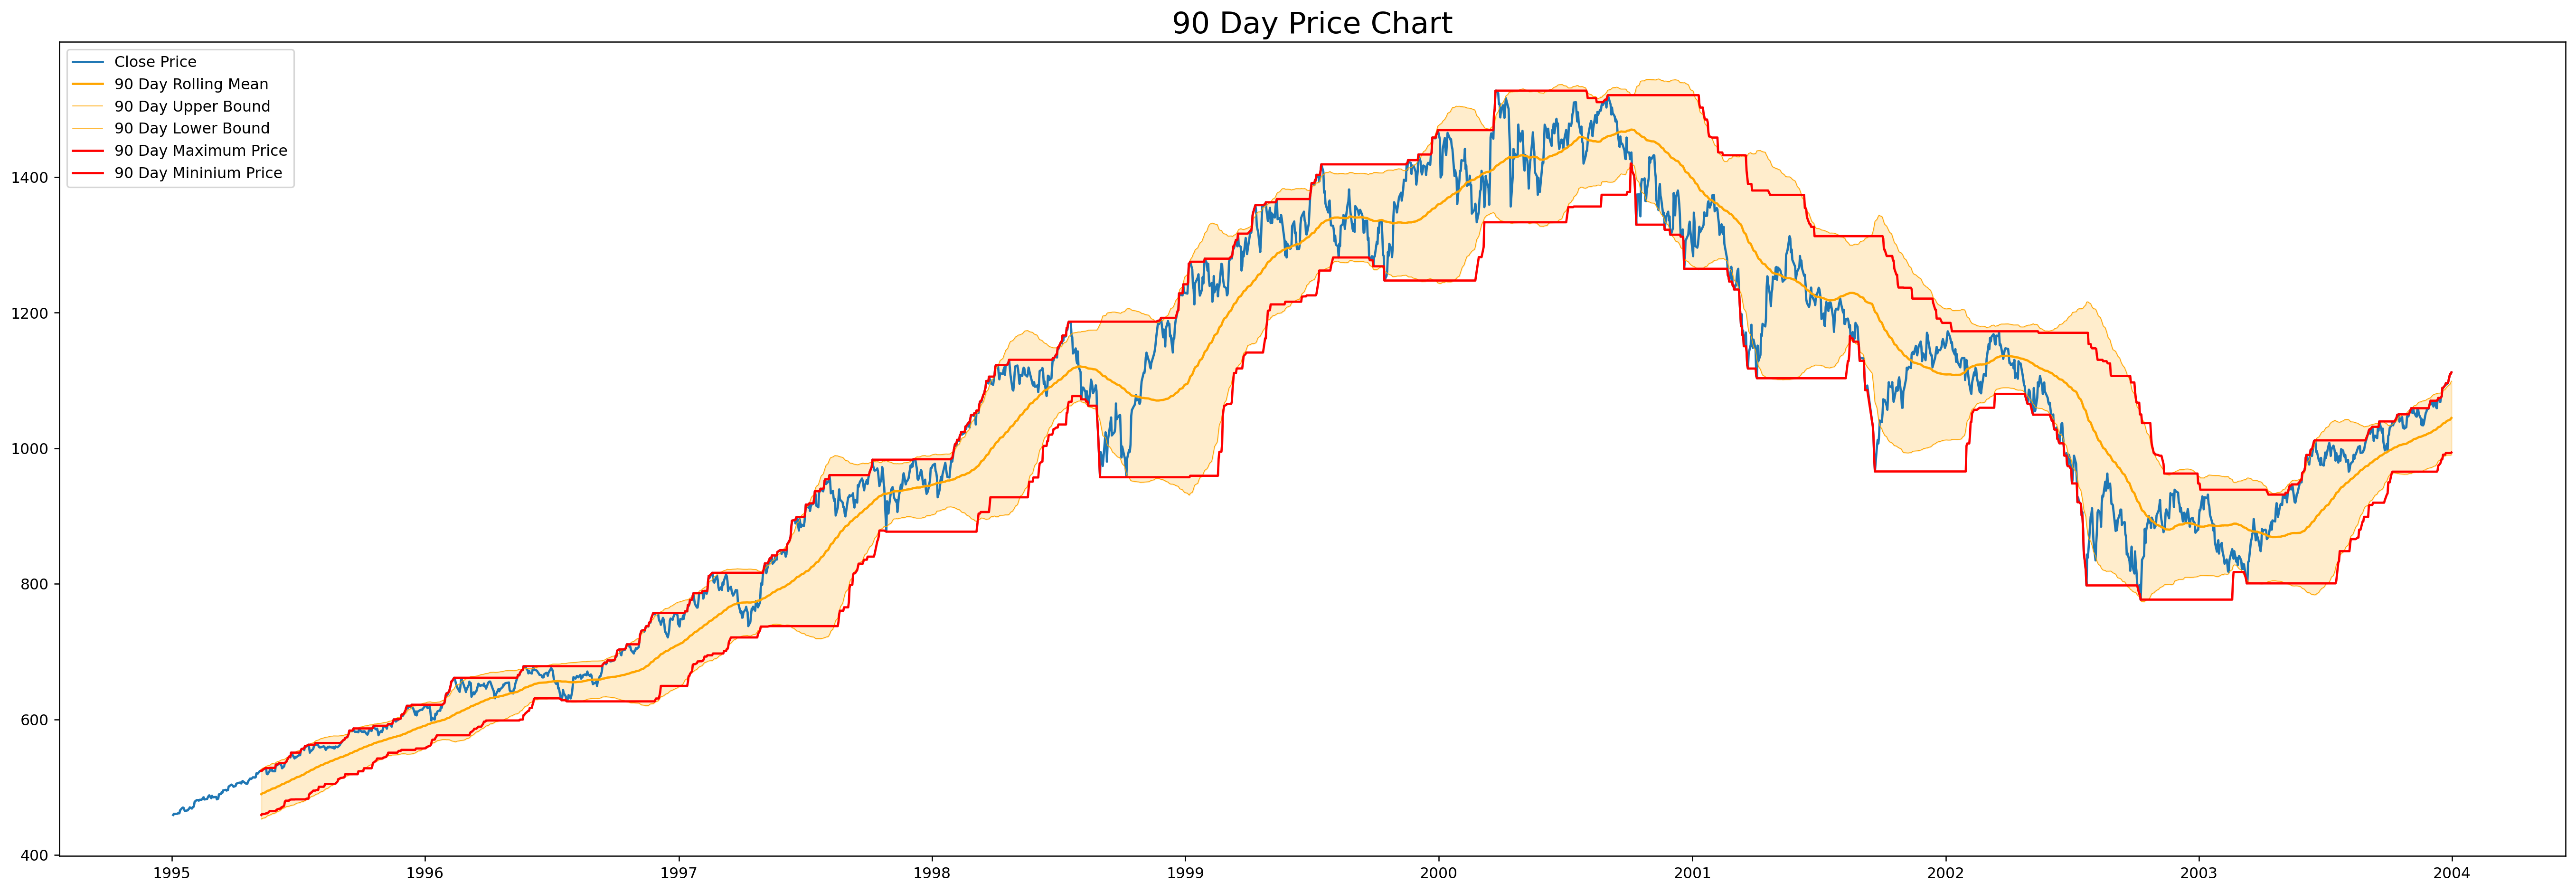

In [63]:

fig, ax = plt.subplots(figsize=(30,10))

ax.plot(stock_df.Close, label='Close Price')

ax.plot(stock_df[days+'_Mean'], label=days+' Day Rolling Mean', color='orange')
ax.plot(stock_df[days+'_Upper'], label=days+' Day Upper Bound', color='orange', linewidth=0.5)
ax.plot(stock_df[days+'_Lower'], label=days+' Day Lower Bound', color='orange', linewidth=0.5)

ax.fill_between(stock_df.index, stock_df[days+'_Upper'], stock_df[days+'_Lower'], color='orange', alpha=0.2)

ax.plot(stock_df[days+'_Max'], color='red', label=days+' Day Maximum Price')
ax.plot(stock_df[days+'_Min'], color='red', label=days+' Day Mininium Price')

ax.legend(loc=2)
ax.set_title(days+' Day Price Chart', fontsize=20)


#ax2 = ax.twinx()
#ax2.plot(stock_df[days+'Price_Var'], label=days+' Day Rolling Price Variance', color='black')
#ax2.plot(stock_df[days+'_pct_roll'], label=days+' Day Rolling Price Variance Mean', color='green')
#ax2.fill_between(stock_df.index, stock_df[days+'_pct_std_upper'], stock_df[days+'_pct_std_lower'], color='orange', alpha=0.2)
#ax2.legend(loc=1)


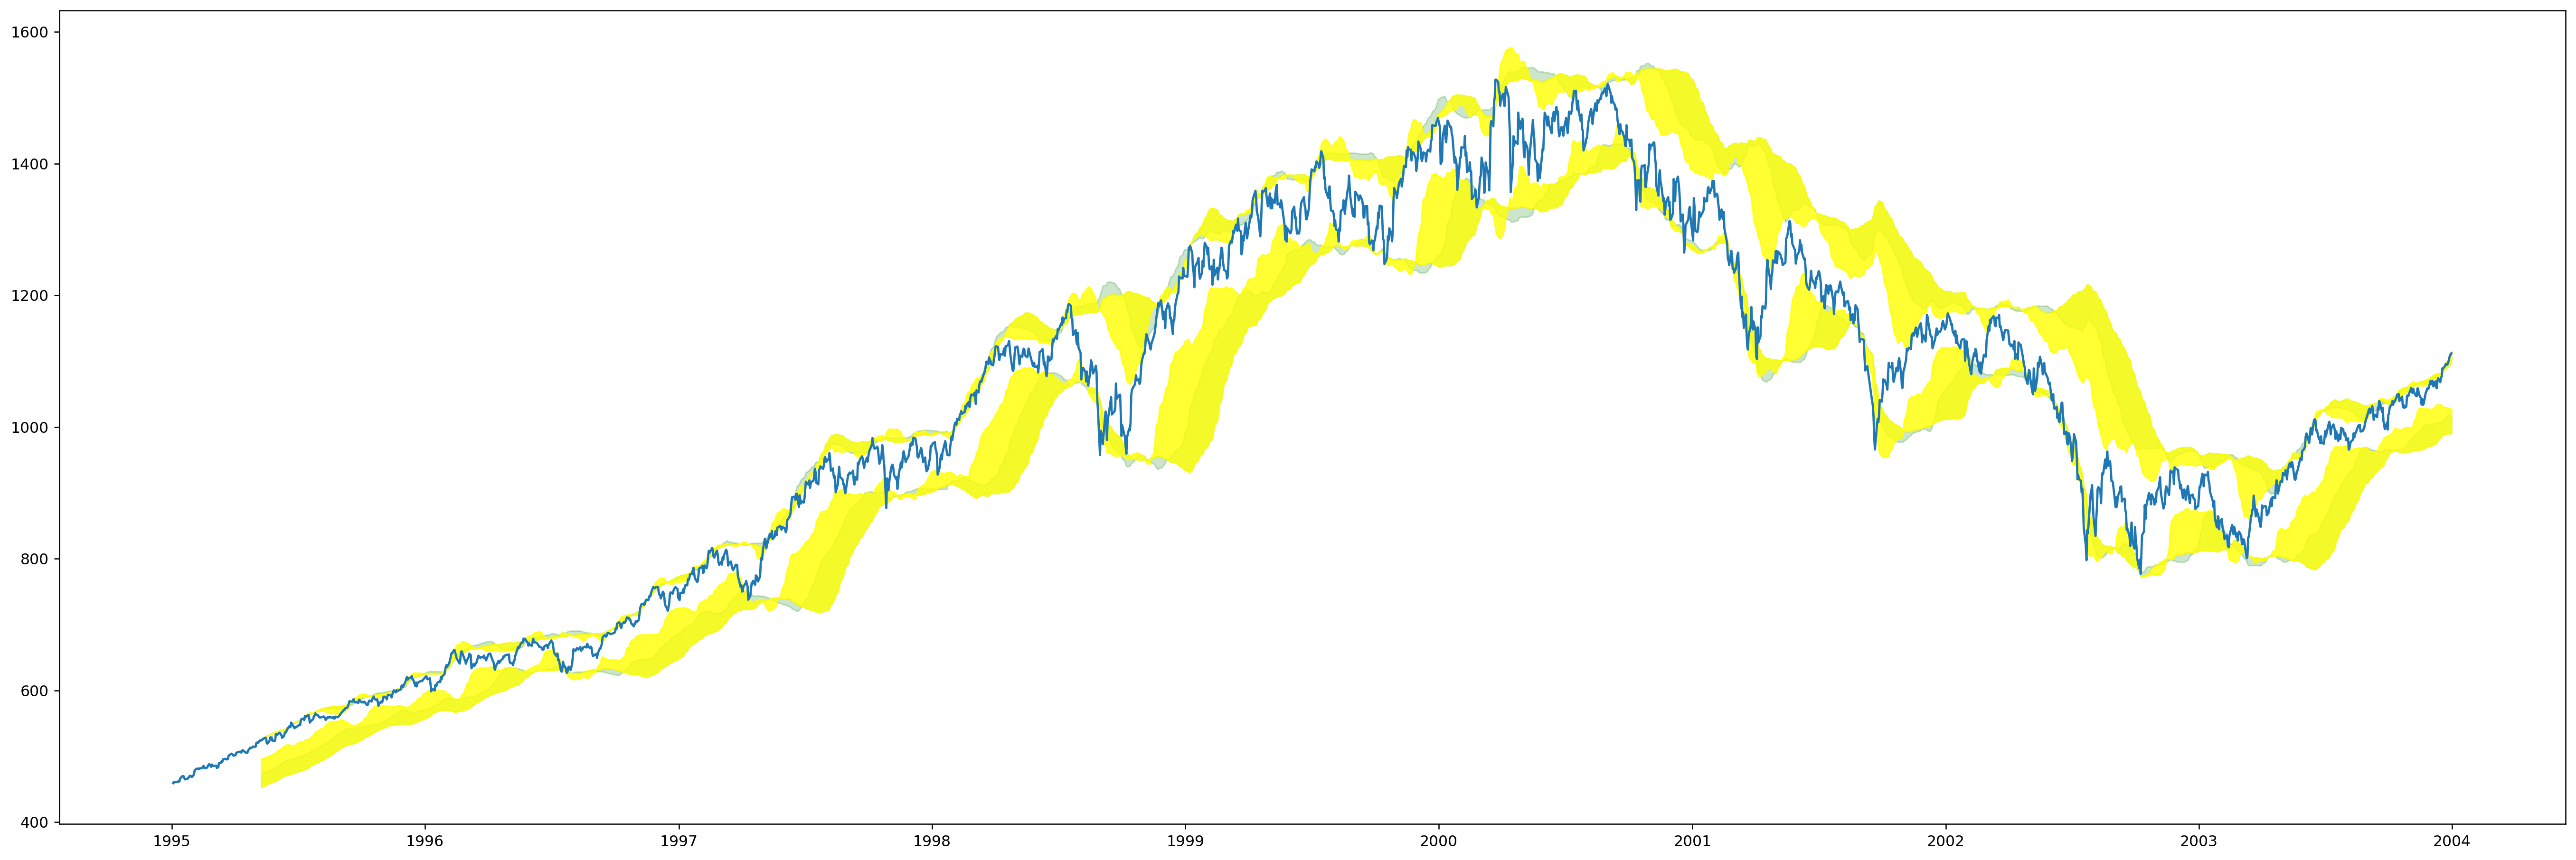

In [31]:
plt.figure(figsize=(30,10))

plt.plot(stock_df.Close, label='Close Price')

plt.fill_between(stock_df.index, stock_df['60_Upper'], stock_df['90_Upper'], color='green', alpha=0.2)
plt.fill_between(stock_df.index, stock_df['60_Lower'], stock_df['90_Lower'], color='green', alpha=0.2)

plt.fill_between(stock_df.index, stock_df['30_Upper'], stock_df['90_Upper'], color='yellow', alpha=0.8)
plt.fill_between(stock_df.index, stock_df['30_Lower'], stock_df['90_Lower'], color='yellow', alpha=0.8)

#plt.fill_between(stock_df.index, stock_df['30_Upper'], stock_df['60_Upper'], color='orange', alpha=0.4)
#plt.fill_between(stock_df.index, stock_df['30_Lower'], stock_df['60_Lower'], color='orange', alpha=0.4)

plt.show()


In [ ]:
deviations=1.5

Text(0.5, 1.0, '90 Day Averages and STD')

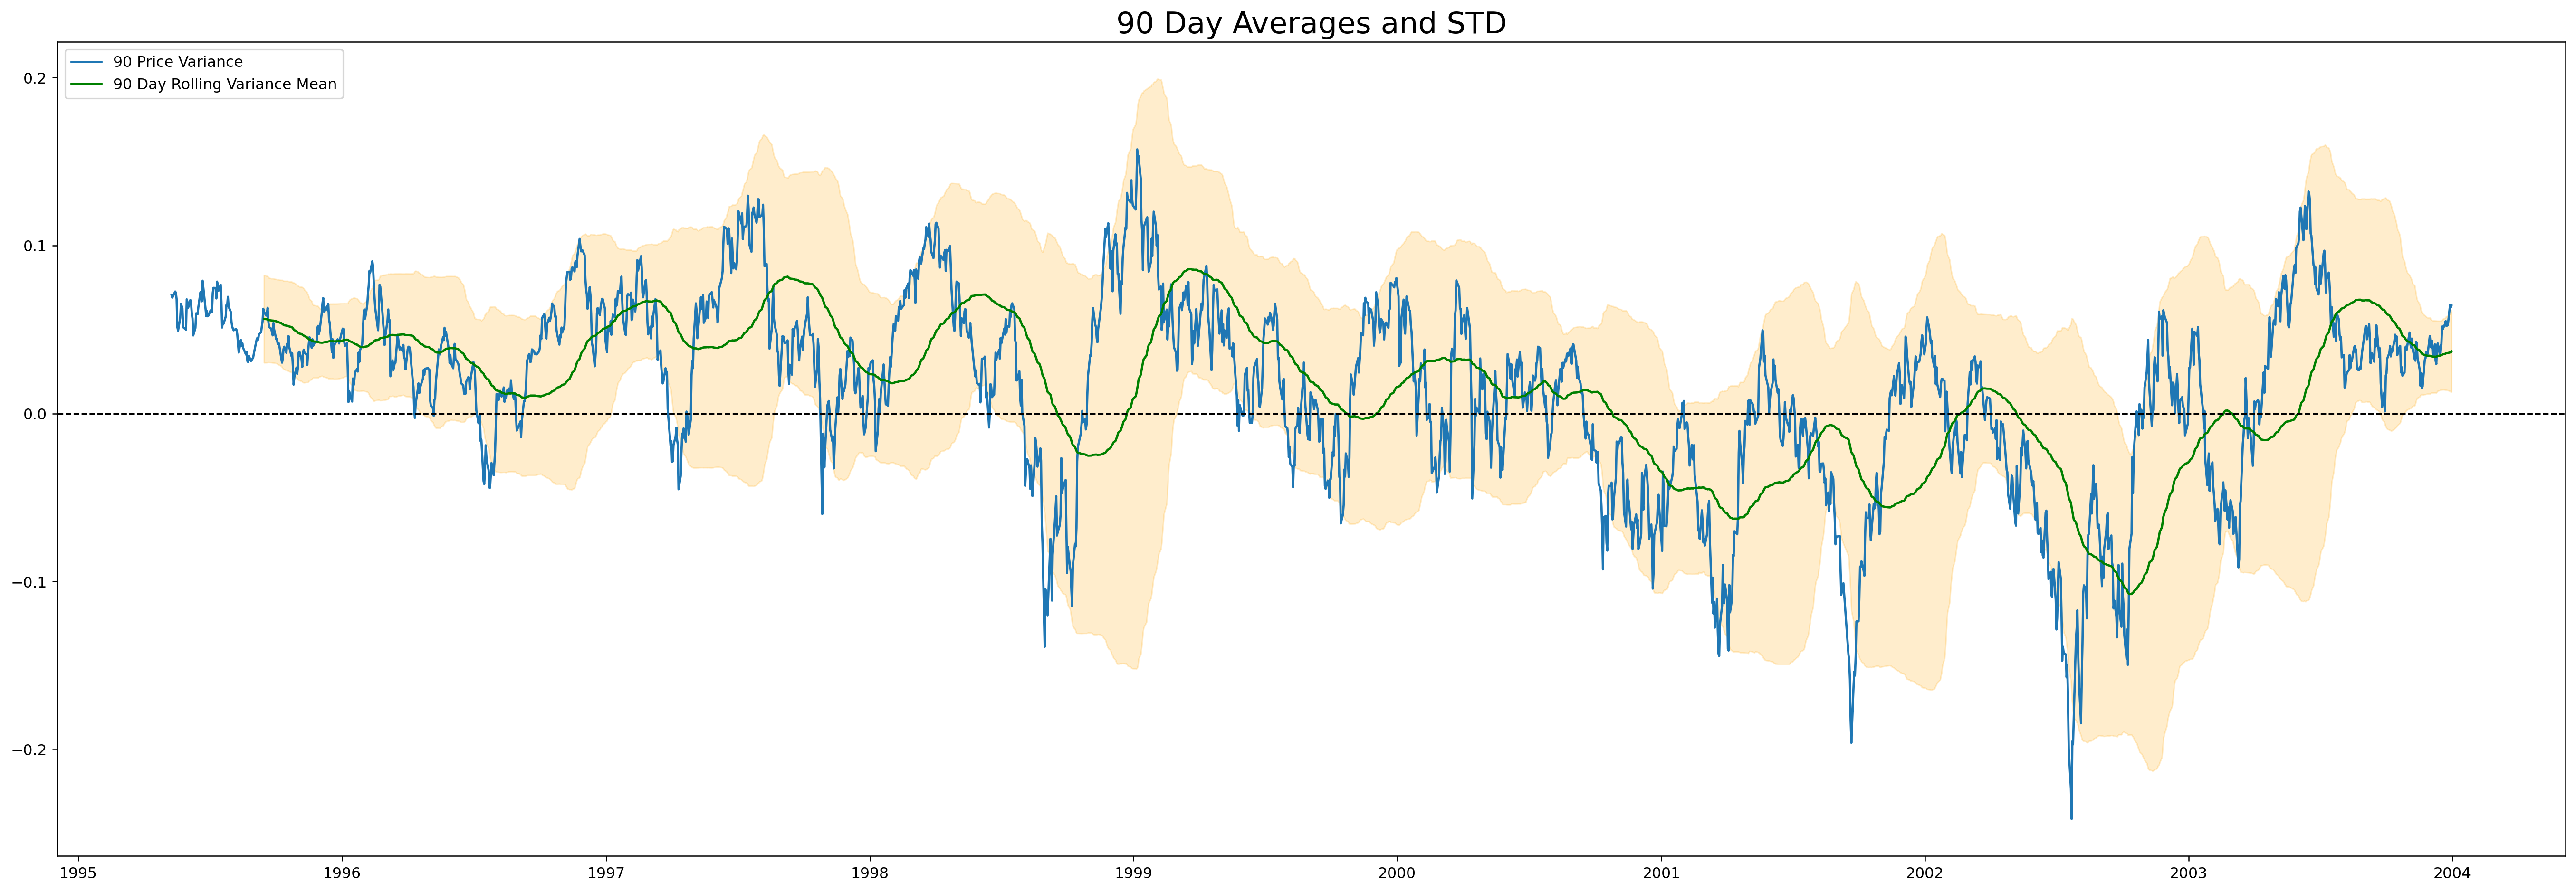

In [74]:
plt.figure(figsize=(30,10))

plt.plot(stock_df[days+'Price_Var'], label=days+' Price Variance')
plt.plot(stock_df[days+'_pct_roll'], label=days+' Day Rolling Variance Mean', color='green')
plt.fill_between(stock_df.index, stock_df[days+'_pct_std_upper'], stock_df[days+'_pct_std_lower'], color='orange', alpha=0.2)



plt.axhline(y=0, color='black', linewidth=1, linestyle='--')


plt.legend(loc=2)
plt.title(days+' Day Averages and STD', fontsize=20)